In [1]:
import pandas as pd
import numpy as np

In [2]:
df_update_all_num= pd.read_csv('df_update_all_num.csv').fillna(0)

In [71]:
df_update_all_num = df_update_all_num.sort_values('salary')

In [88]:
df_update_all_num = df_update_all_num.reset_index(drop=True)
df_update_all_num.head()


,salary,rating,lat,lng,AI,AWS,Azure,Big-Data,C/C++,Data-Analysis,...,Pig,Python,R,SAS,SQL,Scala,Scripting,Spark,Tableau,TensorFlow
0,17160.0,0.0,35.75957,-79.019300,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,17160.0,0.0,35.75957,-79.019300,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,18720.0,3.1,34.75901,-77.339351,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18720.0,0.0,34.75901,-77.339351,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19760.0,0.0,36.16594,-115.139143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [90]:
feature_names = list(df_update_all_num.drop(columns=['salary']).columns)

In [215]:
X = df_update_all_num[feature_names]
y = df_update_all_num['salary']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators = 2000)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print('RMSE:',np.sqrt(mse))

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=15)

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 12969.492088638428


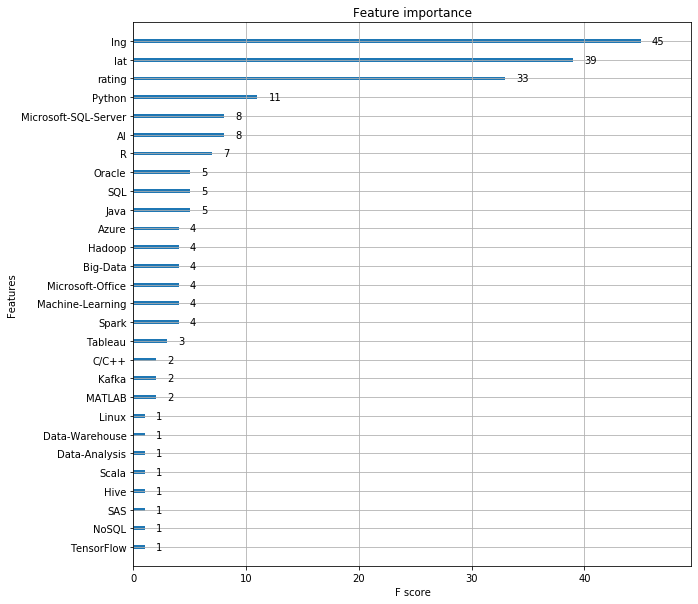

In [217]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

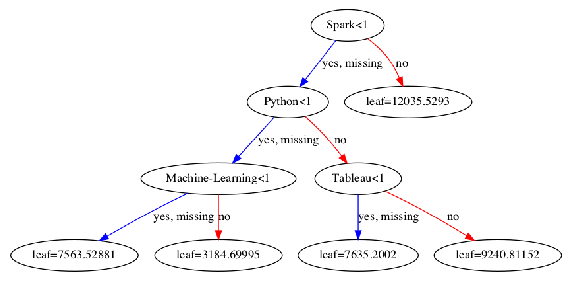

In [218]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [219]:
df_feature = pd.DataFrame(xg_reg.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
df_feature = df_feature.reset_index().drop(columns='index')

feature_sel = []
for row in np.arange(0,len(df_feature)):
    feat = df_feature['feature'][row]
    feature_sel.append(feat)

In [227]:
def max_n_estimators(start_n_estimators,max_n_estimators, step):
    RMSE_list = []
    n_estimators_list = []

    X = df_update_all_num[feature_sel].values
    y = df_update_all_num['salary'].values

    data_dmatrix=xgb.DMatrix(data=X, label=y)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


    for n_estimators in np.arange(start_n_estimators,max_n_estimators, step):
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators = n_estimators)

        xgb_model.fit(X, y)

        y_pred = xgb_model.predict(X)

        mse=mean_squared_error(y, y_pred)
        n_estimators_list.append(n_estimators)
        RMSE_list.append(np.sqrt(mse))
    df = pd.DataFrame({'n_estimators_list' : n_estimators_list,
                           'RMSE_list' : RMSE_list},
                          columns=['n_estimators_list','RMSE_list'])
    return df

In [240]:
df_nestimators = max_n_estimators(10,2600,40)

In [241]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_nestimators['n_estimators_list'][1:], y=df_nestimators['RMSE_list'][1:],
                    mode='markers',
                    name='n_estimators'))
fig.show()

In [250]:
X = df_update_all_num[feature_sel].values
y = df_update_all_num['salary'].values

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model_sel = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators = 3000)

xgb_model_sel.fit(X, y)

y_pred_sel = xgb_model_sel.predict(X)

mse=mean_squared_error(y, y_pred_sel)

print('RMSE:',np.sqrt(mse))

RMSE: 12410.206670325846


In [251]:
y_pred_com = pd.DataFrame(
    {'y': y,
     'y_pred': y_pred,
     'y_pred_sel':y_pred_sel,
    })
y_pred_com

,y,y_pred,y_pred_sel
0,17160.0,23741.183594,19132.615234
1,17160.0,23741.183594,19132.615234
2,18720.0,20037.798828,18010.558594
3,18720.0,28711.408203,24606.904297
4,19760.0,29515.097656,26735.121094
...,...,...,...
1487,176800.0,163153.328125,169992.343750
1488,180000.0,119990.226562,122712.218750
1489,182500.0,183119.953125,179800.546875
1490,192500.0,189936.218750,190428.812500


In [252]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_nestimators['n_estimators_list'][1:], y=df_nestimators['RMSE_list'][1:],
                    mode='markers',
                    name='n_estimators'))
fig.show()

In [249]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=np.arange(0,1492), y=y_pred_com['y_pred'],
                    mode='markers',
                    name='y_pred'))
fig.add_trace(go.Scatter(x=np.arange(0,1492), y=y_pred_com['y'],
                    mode='markers',
                    name='y'))
fig.add_trace(go.Scatter(x=np.arange(0,1492), y=y_pred_com['y_pred_sel'],
                    mode='markers',
                    name='y_pred_sel'))
fig.show()

In [253]:
import pickle
pickle.dump(xgb_model_sel, open('final_prediction.pickle', 'wb'))

In [254]:
xgb_model_loaded = pickle.load(open('final_prediction.pickle', "rb"))

In [255]:
xgb_model_loaded.predict(X[:1])

array([19132.615], dtype=float32)